In [2]:
import matplotlib.pyplot as plt # visualization
import missingno as msno # missing data visualization
import numpy as np # array manipulation
import pandas as pd # dataframe manipulation
import scipy # statistical tests
import seaborn as sns # visualization
from zipfile import ZipFile # reading zip file
import random

# File descriptions
1. train.csv - the training set, including the columns of:
* Feature_1 - Feature_25
    * Ret_MinusTwo, Ret_MinusOne
    * Ret_2 - Ret_120
    * Ret_121 - Ret_180: target variables
    * Ret_PlusOne, Ret_PlusTwo: target variables
    * Weight_Intraday, Weight_Daily
2. test.csv - the test set, including the columns of:
* Feature_1 - Feature_25
    * Ret_MinusTwo, Ret_MinusOne
    * Ret_2 - Ret_120
# Data fields
* Feature_1 to Feature_25: different features relevant to prediction
    * Ret_MinusTwo:  this is the return from the close of trading on day D-2 to the close of trading on day D-1 (i.e. 1 day)
    * Ret_MinusOne: this is the return from the close of trading on day D-1 to the point at which the intraday returns start on day D (approximately 1/2 day)
    * Ret_2 to Ret_120: these are returns over approximately one minute on day D. Ret_2 is the return between t=1 and t=2. 
    * Ret_121 to Ret_180: intraday returns over approximately one minute on day D. These are the target variables you need to predict as {id}_{1-60}. 
    * Ret_PlusOne: this is the return from the time Ret_180 is measured on day D to the close of trading on day D+1. (approximately 1 day). **This is a target variable you need to predict as {id}_61.** 
    * Ret_PlusTwo: this is the return from the close of trading on day D+1 to the close of trading on day D+2 (i.e. 1 day) **This is a target variable you need to predict as {id}_62.** 
    * Weight_Intraday: weight used to evaluate intraday return predictions Ret 121 to 180
    * Weight_Daily: weight used to evaluate daily return predictions (Ret_PlusOne and Ret_PlusTwo).

In [ ]:
train = pd.read_csv(r'D:\Winton_kaggle\Data\train.csv')
test = pd.read_csv(r'D:\Winton_kaggle\Data\test_2.csv')

In [ ]:
train.info()

# Ideas
* could try to plot the daily stock values so as to gain the knowledge if trends in the fluctuations

In [ ]:
id = random.randint(1,40000)

stock_val_intraday = np.array(train.iloc[id, 28:207]) # tracking the change in values of a random stock
x = np.arange(len(stock_val_intraday))

#plt.scatter(x, stock_val_intraday, color='blue', marker='o')
plt.plot(x, stock_val_intraday, color='orange', linestyle='-', label='Connecting Line')

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("1D Array Scatter Plot (Index vs Value)")

# Optional: add grid
plt.grid(True)

plt.show()

### Inference
> There are ccertain stocks which have very irratic behaviour(fluctuations)

> Some stocks' values have three to four fixed values

> Some Stocks' values shoot out of the ordinary on a very special occasion

> some Stocks' have very little no variations

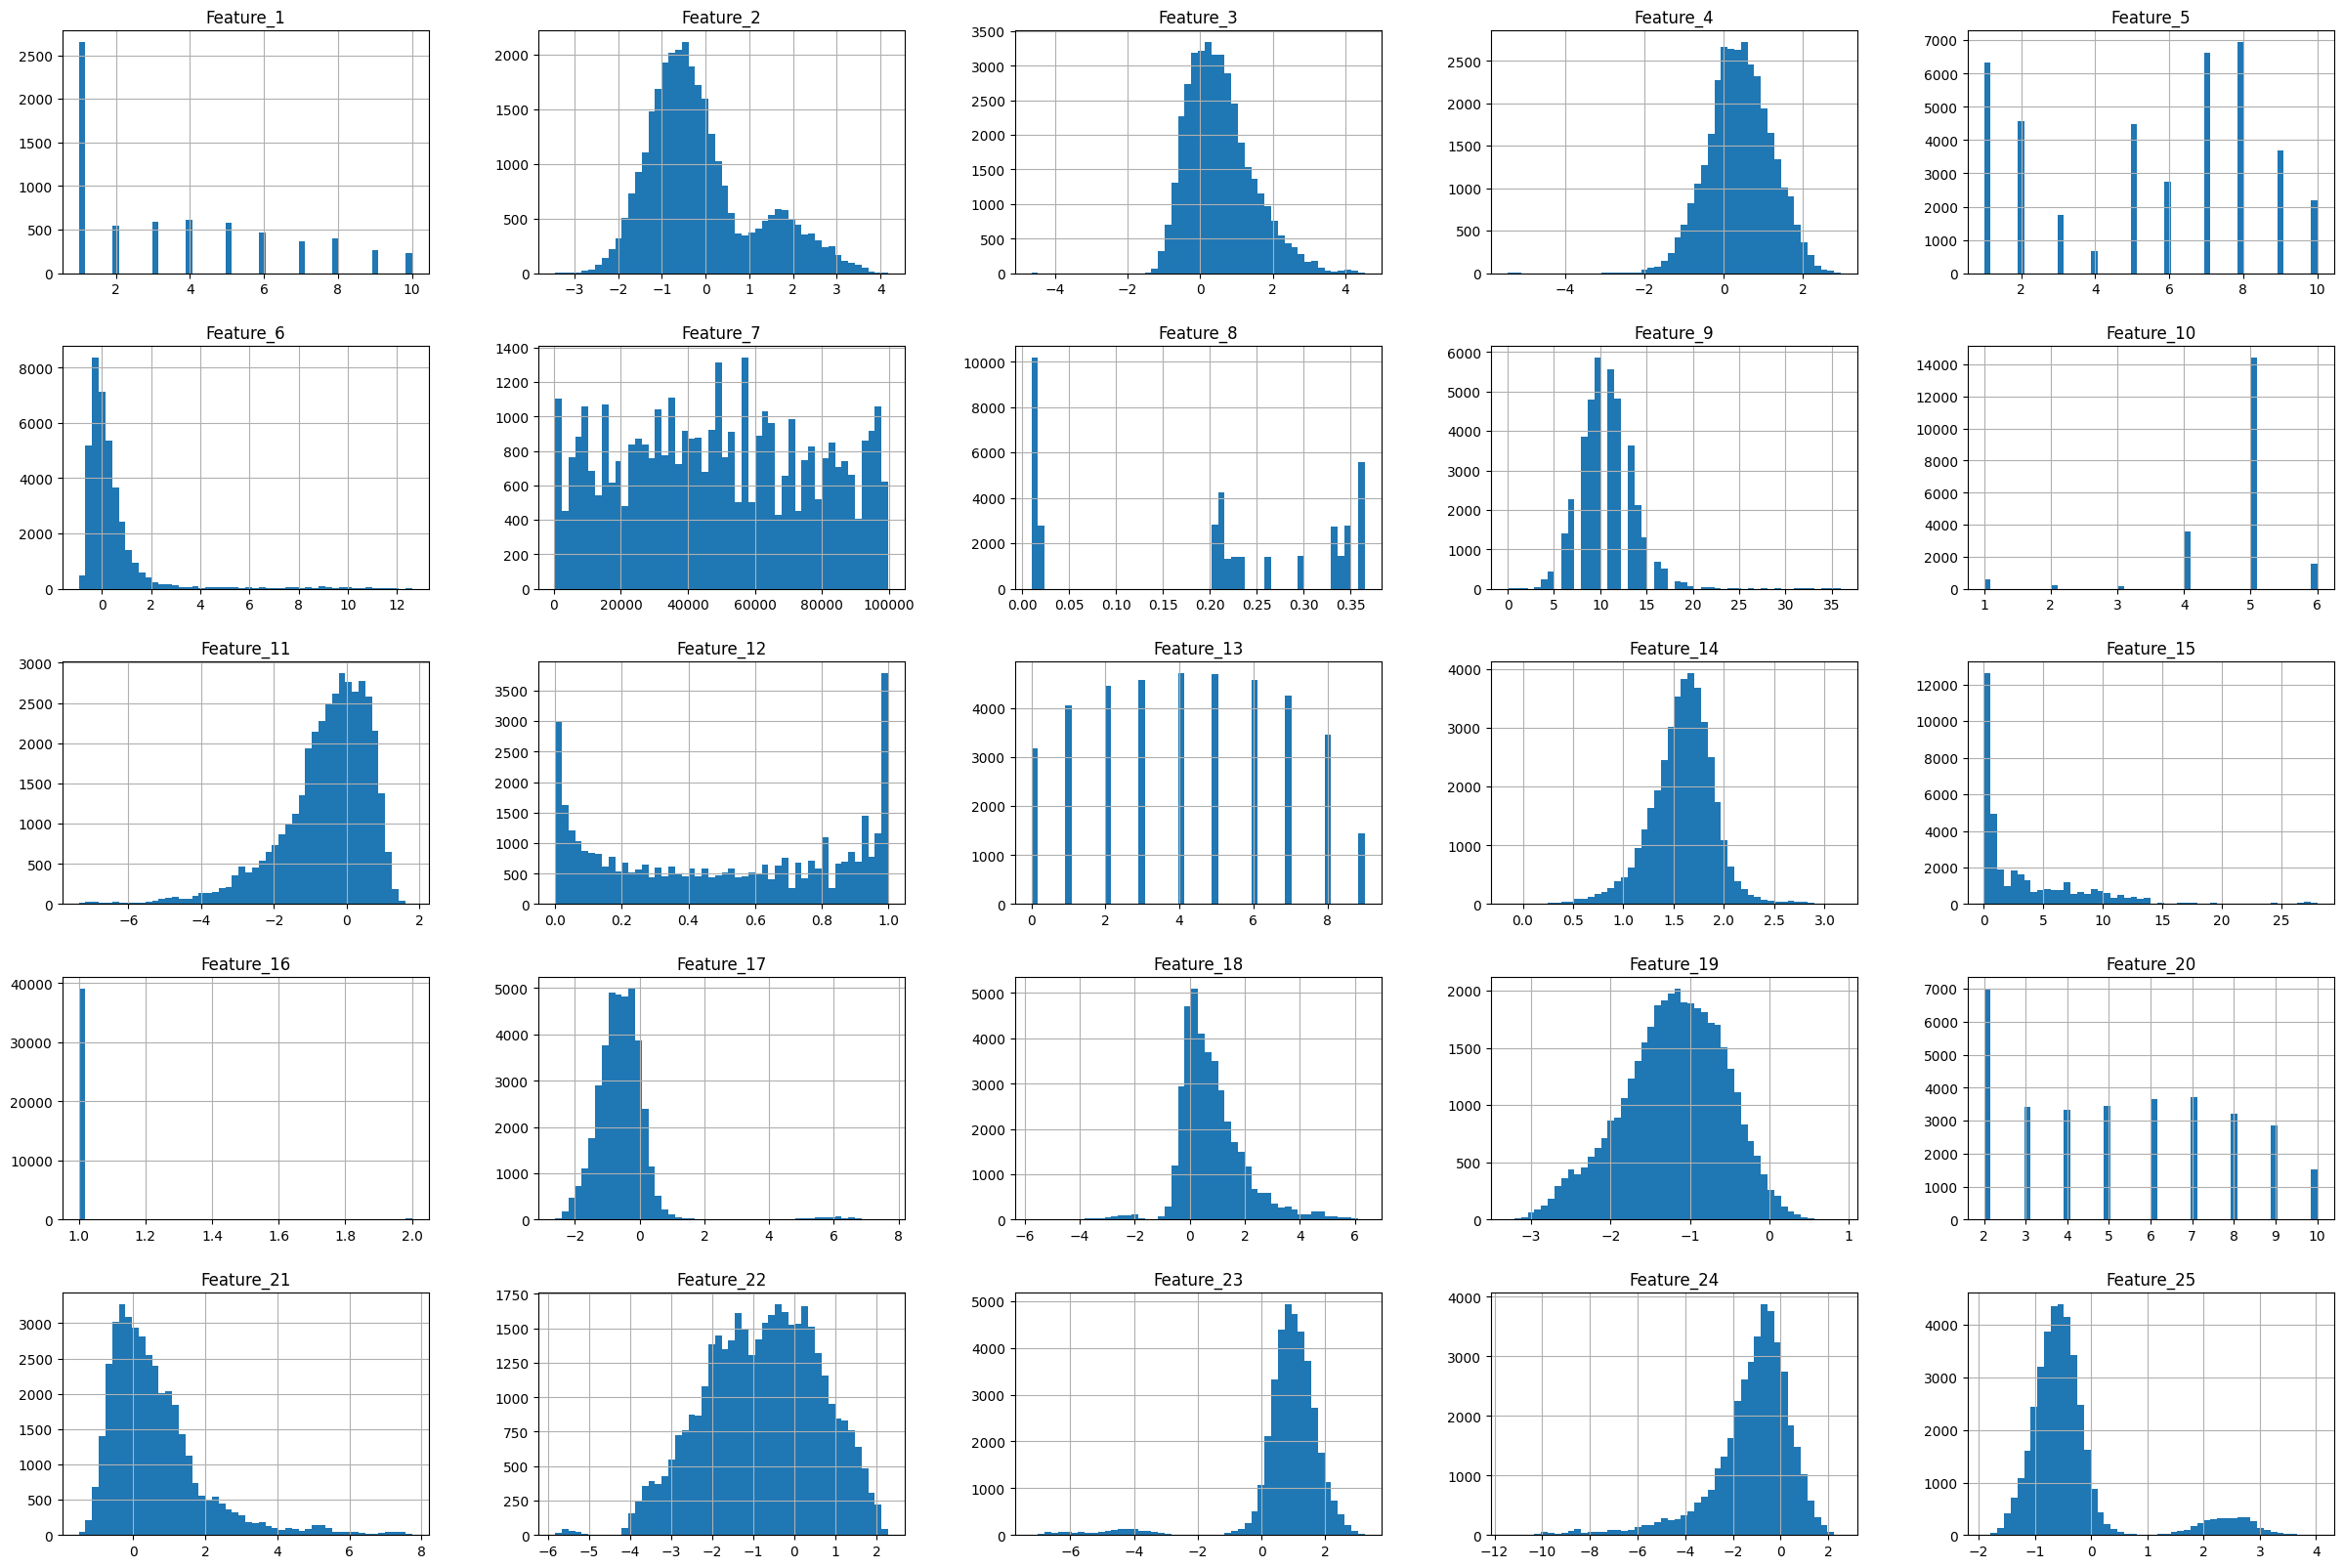

In [47]:
train.iloc[:, 1:26].hist(bins=50, figsize=(30,20))

plt.show()

> some features seem categorical which could be indicator of specific fluctuations in a stock

In [48]:
rando_shit=pd.get_dummies(train['Feature_13'])

In [55]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

Feature_13 = ordinal_encoder.fit_transform(np.array(train['Id','Feature_13']))

KeyError: ('Id', 'Feature_13')